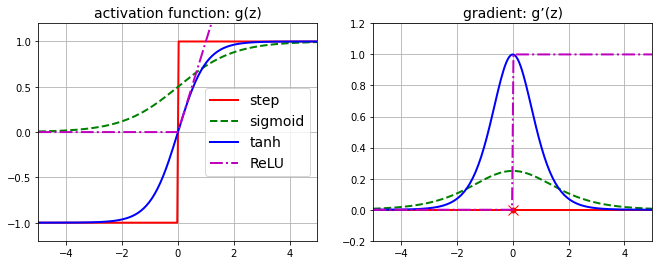

In [1]:
# 파이썬 2, 파이썬 3 지원
from __future__ import division, print_function, unicode_literals
# 관련 라이브러리
import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def logit(z):
 return 1 / (1 + np.exp(-z))
def relu(z):
 return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
 return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step")
plt.plot(z, logit(z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("activation function: g(z)", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="step ")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("gradient: g’(z)", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()
# 화면 출력 확인 및 각 활성함수의 특징을 비교 서술
# step 활성함수는 선형 함수의 결과를 이진 분류로 나타내기 위해, 주로 단일 퍼셉트론에서 사용
# sigmoid 선형 함수의 결과를 0~1 값을 비선형 형태로 변형하는 활성 함수
# tanh 양극 시그모이드라고도 불리고 선형함수의 결과를 -1 ~ 1 사이의 값을 비선형 형태로 변형
# ReLU 음수의 입력은 없애고, 양수로만 값을 바꾸는 활성함수

## step 함수는 선형 함수의 결과를 이진분류로 나타내기 위하여 임계치 이상에서 1 or 0 출력, 주로 단일 퍼셉트론에서 사용
## sigmoid 함수는 선형함수의 결과를 비선형 함수로 변형하기 위해 사용, 주로 classfication 에서 사용
### 모델의 깊이가 깊어지면 입력이 Saturated 되어 gradient vanishing 문제 발생
## Tanh 함수는 선형함수의 결과를 -1 ~ +1 사이의 비선형 형태로 변형하기 위해 사용, 편향되지 않게 표현할 수 있지만 여전히 gradient vanishing 문제 발생
## Relu 함수는 음수는 0이 되고 양수는 그대로 사용, 다른 함수들에 비해서 빠르고 gradient vanishin 문제가 발생하지 않음
### 입력값이 0보다 작다면 뉴런이 죽어 가중치가 업데이트 되지 않을 수 있음

In [16]:
import torch
import numpy as np
import torchvision
x = torch.rand(5,4)
x
x.shape
x = torch.cuda.device(0)

In [19]:
def CEE_numpy(predict, label):
  return -np.sum(label*np.log(predict+1e-10))

def CEE_torch(predict, label):
  sig = torch.nn.Sigmoid()
  BCELoss = torch.nn.BCELoss()
  return BCELoss(sig(predict), label)



label = np.array([1, 0, 0, 0, 0])
predict = np.array([0.57, 0.05, 0.14, 0.10, 0.14])
label_t = torch.tensor([1, 0, 0, 0, 0], dtype=torch.float64)
predict_t = torch.tensor([0.57, 0.05, 0.14, 0.10, 0.14], dtype=torch.float64)

print(CEE_numpy(predict, label))
print(CEE_torch(predict_t, label_t))

0.5621189179781027
tensor(0.6885, dtype=torch.float64)
